In [14]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [15]:
column_names=['column 1','column 2']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\CNP\CNP_NL_20.xlsx', header=None,names=column_names)
df

,column 1,column 2
0,-0.45866,-1.235200
1,0.24348,-0.873130
2,0.25071,-0.808030
3,0.21462,-0.951980
4,0.12829,-1.031400
...,...,...
3995,NaN,0.278030
3996,0.74741,0.428530
3997,NaN,0.085708
3998,0.70388,0.351420


In [16]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	1600
float64		column 2	0


In [17]:
df.describe()

,column 1,column 2
count,2400.000000,4000.000000
mean,-0.001950,0.005335
std,0.604145,0.725858
min,-1.392000,-1.376500
25%,-0.342475,-0.522537
50%,0.005613,0.006928
75%,0.344247,0.547872
max,1.312800,1.344400


<AxesSubplot:>

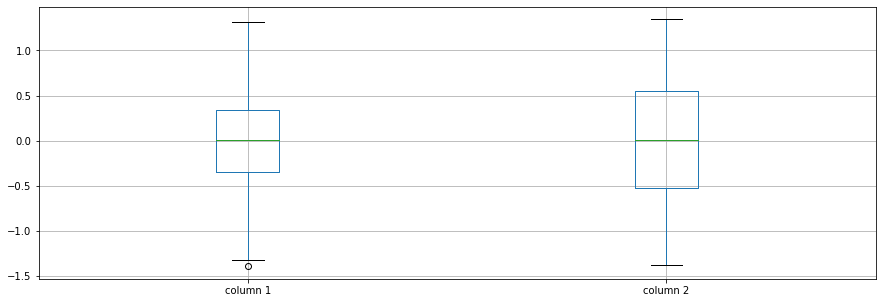

In [18]:
df.boxplot(return_type='axes', figsize=(15,5))

In [19]:
df.mean()

column 1   -0.001950
column 2    0.005335
dtype: float64

In [20]:
corr=df.corr()
corr

,column 1,column 2
column 1,1.000000,-0.041647
column 2,-0.041647,1.000000


In [21]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [23]:
%timeit
imputer = md.Midas(layer_structure = [2,2+12,2+12+12,2+12+12+12,2+12+12+12+12,2+12+12+12,2+12+12,2+12,2], vae_layer = False, seed = 12)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [2]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 1.0741295058727265
Epoch: 1 , loss: 1.0759407050609588
Epoch: 2 , loss: 1.0739689774513244
Epoch: 3 , loss: 1.0724459245204925
Epoch: 4 , loss: 1.0733008365631103
Epoch: 5 , loss: 1.0738243656158448
Epoch: 6 , loss: 1.073555903673172
Epoch: 7 , loss: 1.0744695115089415
Epoch: 8 , loss: 1.0740677466392516
Epoch: 9 , loss: 1.0729384338855743
Epoch: 10 , loss: 1.0742056357860565
Epoch: 11 , loss: 1.0744115417003632
Epoch: 12 , loss: 1.076064453125
Epoch: 13 , loss: 1.074061211824417
Epoch: 14 , loss: 1.0743973355293275
Epoch: 15 , loss: 1.0758407537937165
Epoch: 16 , loss: 1.0730312633514405
Epoch: 17 , loss: 1.0742567200660706
Epoch: 18 , loss: 1.0742716751098633
Epoch: 19 , loss: 1.0736134362220764
Epoch: 20 , loss: 1.0742626569271088
Epoch: 21 , loss: 1.0729143133163452
Epoch: 22 , loss: 1.0740880315303802
Epoch: 23 , loss: 1.0741342523097992
Epoch: 24 , loss: 1.0729219706058502
Epoch: 25 , loss: 1.0720

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4000, 2)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.025127
column 2   -1.258200
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\CNP.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2
0,0.000000,0.0
1,0.000000,0.0
2,0.000000,0.0
3,0.000000,0.0
4,0.000000,0.0
...,...,...
3995,-0.892694,0.0
3996,0.000000,0.0
3997,-1.076644,0.0
3998,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(35.124689083569784, 64.9340549279942)

In [17]:
NRMS=numerator/denominator
NRMS


0.5409286255497179

In [18]:
new_df.iloc[66,:]

column 1    0.12305
column 2   -1.03610
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2
0,-0.458660,-1.235200
1,0.243480,-0.873130
2,0.250710,-0.808030
3,0.214620,-0.951980
4,0.128290,-1.031400
...,...,...
3995,-0.000044,0.278030
3996,0.747410,0.428530
3997,-0.000044,0.085708
3998,0.703880,0.351420


In [20]:
imputations[-1].to_excel("CNP_NL_20(imp).xlsx", index=False, header=False)